# Real Waste Model Fitting and Evaluation

In [42]:
# some necessary imports... may need to trim later


import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.utils import np_utils, plot_model, to_categorical
from keras.models import Sequential, Model
# I will need them all actually
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras import layers, Input
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from IPython.display import display, Image
import PIL

import pickle


## Loading .pkl files from preprocessing notebook

In [2]:
fh = open('RealWaste_X_train_aug.pkl', 'rb')
X_train_aug=pickle.load(fh)
fh.close()

fh = open('RealWaste_X_test.pkl', 'rb')
X_test=pickle.load(fh)
fh.close()

fh = open('RealWaste_y_train_aug.pkl', 'rb')
y_train_aug=pickle.load(fh)
fh.close()

fh = open('RealWaste_y_test.pkl', 'rb')
y_test=pickle.load(fh)
fh.close()

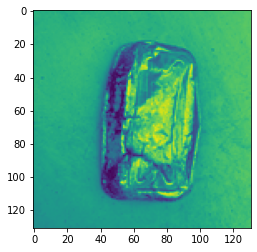

In [7]:
plt.imshow(X_train_aug[3135])

In [8]:
y_train_aug[3135]

3

## Classification using basic CNN's

In [31]:
# I'd like to plot accuracy against training epochs...

def plot_epochs(model_fit, model_id=""):
    acc = model_fit.history['accuracy']
    val_acc = model_fit.history['val_accuracy']
    epochs = list(range(1, (len(acc) + 1)))
    plt.plot(epochs, acc, label="training accuracy")
    plt.plot(epochs, val_acc, label="validation accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.xticks(epochs)
    plt.title("accuracy for CNN model " + model_id)
    plt.legend()
    plt.show()

In [19]:
X_train_aug = np.asarray(X_train_aug)
X_test = np.asarray(X_test)
y_train_aug = np.asarray(y_train_aug)
y_test = np.asarray(y_test)

In [20]:
# starting with a very basic convolutional model


CNN_model_1 = Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

CNN_model_1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 131, 131, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 65, 65, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 135200)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               17305728  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 9)                 1161      
                                                      

In [21]:
CNN_model_1.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_1_fit = CNN_model_1.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 118s 247ms/step - loss: 28.3058 - accuracy: 0.1864 - val_loss: 2.1619 - val_accuracy: 0.1840
Epoch 2/20
476/476 [==============================] - 105s 220ms/step - loss: 2.1469 - accuracy: 0.1963 - val_loss: 2.1527 - val_accuracy: 0.1840
Epoch 3/20
476/476 [==============================] - 107s 225ms/step - loss: 2.1402 - accuracy: 0.1963 - val_loss: 2.1521 - val_accuracy: 0.1840
Epoch 4/20
476/476 [==============================] - 107s 225ms/step - loss: 2.1391 - accuracy: 0.1963 - val_loss: 2.1527 - val_accuracy: 0.1840
Epoch 5/20
476/476 [==============================] - 106s 222ms/step - loss: 2.1389 - accuracy: 0.1963 - val_loss: 2.1530 - val_accuracy: 0.1840
Epoch 6/20
476/476 [==============================] - 105s 221ms/step - loss: 2.1389 - accuracy: 0.1963 - val_loss: 2.1532 - val_accuracy: 0.1840
Epoch 7/20
476/476 [==============================] - 106s 222ms/step - loss: 2.1388 - accuracy: 0.1963 - val_loss: 2.1532 

In [22]:


CNN_model_2 = Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

CNN_model_2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 131, 131, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 65, 65, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 135200)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               17305728  
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

In [23]:
CNN_model_2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_2_fit = CNN_model_2.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 117s 244ms/step - loss: 22.2154 - accuracy: 0.1801 - val_loss: 2.1528 - val_accuracy: 0.1840
Epoch 2/20
476/476 [==============================] - 94s 197ms/step - loss: 2.1406 - accuracy: 0.1954 - val_loss: 2.1532 - val_accuracy: 0.1840
Epoch 3/20
476/476 [==============================] - 95s 199ms/step - loss: 2.1392 - accuracy: 0.1958 - val_loss: 2.1533 - val_accuracy: 0.1840
Epoch 4/20
476/476 [==============================] - 95s 199ms/step - loss: 2.1400 - accuracy: 0.1967 - val_loss: 2.1536 - val_accuracy: 0.1840
Epoch 5/20
476/476 [==============================] - 96s 201ms/step - loss: 2.1401 - accuracy: 0.1959 - val_loss: 2.1527 - val_accuracy: 0.1840
Epoch 6/20
476/476 [==============================] - 96s 201ms/step - loss: 2.1403 - accuracy: 0.1964 - val_loss: 2.1528 - val_accuracy: 0.1840
Epoch 7/20
476/476 [==============================] - 96s 201ms/step - loss: 2.1395 - accuracy: 0.1961 - val_loss: 2.1535 - val_

In [24]:
CNN_model_3 = Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

CNN_model_3.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 131, 131, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 65, 65, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 65, 65, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [25]:
CNN_model_3.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_3_fit = CNN_model_3.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 89s 185ms/step - loss: 2.5905 - accuracy: 0.2691 - val_loss: 1.6269 - val_accuracy: 0.4248
Epoch 2/20
476/476 [==============================] - 89s 186ms/step - loss: 1.6880 - accuracy: 0.3983 - val_loss: 1.4129 - val_accuracy: 0.5131
Epoch 3/20
476/476 [==============================] - 89s 188ms/step - loss: 1.4849 - accuracy: 0.4715 - val_loss: 1.3563 - val_accuracy: 0.5142
Epoch 4/20
476/476 [==============================] - 90s 188ms/step - loss: 1.2725 - accuracy: 0.5564 - val_loss: 1.3800 - val_accuracy: 0.5258
Epoch 5/20
476/476 [==============================] - 90s 189ms/step - loss: 1.0779 - accuracy: 0.6277 - val_loss: 1.2258 - val_accuracy: 0.5552
Epoch 6/20
476/476 [==============================] - 90s 189ms/step - loss: 0.8865 - accuracy: 0.6981 - val_loss: 1.3043 - val_accuracy: 0.5510
Epoch 7/20
476/476 [==============================] - 90s 189ms/step - loss: 0.7325 - accuracy: 0.7576 - val_loss: 1.3276 - val_ac

In [26]:
CNN_model_4 = Sequential([
    Conv2D(128,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

CNN_model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 131, 131, 128)     1280      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 65, 65, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 65, 65, 64)        73792     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 65536)             0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [27]:
CNN_model_4.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_4_fit = CNN_model_4.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 372s 780ms/step - loss: 2.4030 - accuracy: 0.2359 - val_loss: 1.9252 - val_accuracy: 0.2944
Epoch 2/20
476/476 [==============================] - 368s 772ms/step - loss: 1.9474 - accuracy: 0.2892 - val_loss: 1.8193 - val_accuracy: 0.3344
Epoch 3/20
476/476 [==============================] - 369s 776ms/step - loss: 1.8588 - accuracy: 0.3290 - val_loss: 1.7172 - val_accuracy: 0.3901
Epoch 4/20
476/476 [==============================] - 369s 776ms/step - loss: 1.7632 - accuracy: 0.3658 - val_loss: 1.7170 - val_accuracy: 0.3796
Epoch 5/20
476/476 [==============================] - 368s 773ms/step - loss: 1.6595 - accuracy: 0.4086 - val_loss: 1.7070 - val_accuracy: 0.4027
Epoch 6/20
476/476 [==============================] - 372s 781ms/step - loss: 1.5299 - accuracy: 0.4598 - val_loss: 1.6262 - val_accuracy: 0.4364
Epoch 7/20
476/476 [==============================] - 367s 770ms/step - loss: 1.3579 - accuracy: 0.5258 - val_loss: 1.8261 -

In [28]:
CNN_model_5 = Sequential([
    Conv2D(128,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.4),
    Dense(128,activation='relu'),
    Dropout(0.4),
    Dense(9,activation='softmax')
])

CNN_model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 131, 131, 128)     1280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 65, 65, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 65, 65, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)      

In [29]:
CNN_model_5.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_5_fit = CNN_model_5.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 370s 775ms/step - loss: 2.2090 - accuracy: 0.2038 - val_loss: 2.0383 - val_accuracy: 0.2860
Epoch 2/20
476/476 [==============================] - 366s 769ms/step - loss: 2.0633 - accuracy: 0.2504 - val_loss: 1.8771 - val_accuracy: 0.3218
Epoch 3/20
476/476 [==============================] - 362s 761ms/step - loss: 1.9474 - accuracy: 0.2862 - val_loss: 1.6883 - val_accuracy: 0.4069
Epoch 4/20
476/476 [==============================] - 364s 764ms/step - loss: 1.8384 - accuracy: 0.3319 - val_loss: 1.5686 - val_accuracy: 0.4532
Epoch 5/20
476/476 [==============================] - 365s 766ms/step - loss: 1.7343 - accuracy: 0.3791 - val_loss: 1.4397 - val_accuracy: 0.5016
Epoch 6/20
476/476 [==============================] - 365s 766ms/step - loss: 1.6180 - accuracy: 0.4194 - val_loss: 1.2906 - val_accuracy: 0.5542
Epoch 7/20
476/476 [==============================] - 364s 766ms/step - loss: 1.4923 - accuracy: 0.4684 - val_loss: 1.2798 -

These models are all very _casual_:  I threw together some Conv2D layers and some Dense layers, with MaxPooling, Flatten, and Dropout layers as appropriate.  At a first glance, some of the models achieved much higher accuracy than I would have expected. With nine categories, "coin toss" accuracy would be, of course, 0.1111 - and a couple of these models, despite the crudeness and simplicity of their design, edged over 50%.  

The fitting behavior will be easier to observe by plotting accuracies vs epochs:

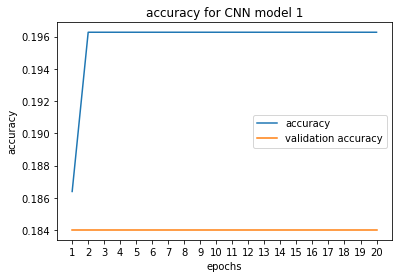

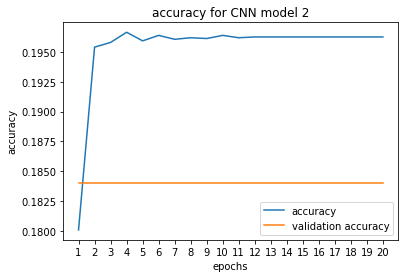

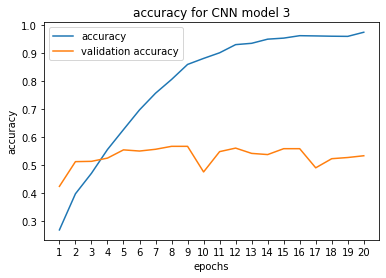

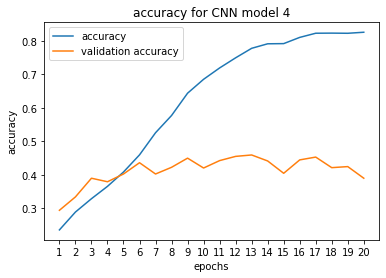

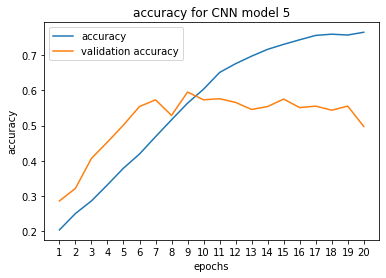

In [30]:
elist = list(range(1, 6))
for e in elist:
    stringname = "CNN_model_" + str(e) + "_fit"
    plot_epochs(eval(stringname), str(e))

From these plots it's easy to see how inadequate models 1 and 2 are:  validation accuracy remains absolutely flat.  (Specifically, what does this mean?)  Obviously these are not promising models at all.  Models 3 - 5 demonstrate at least some progress with validation - but also, some overfitting, even within 20 epochs.

I can also note: model 2, which adds only another Dense layer as compared to model 1, converges to exactly the same values for both accuracies.  The extra Dense layer doesn't seem to have done much of anything.  In models 3 - 5, though, adding additional Conv2D layers at the front seems to have improved accuracy substantially.  Of these models, model 4 seems the worst.  In model 5, the dropout rate is increased, which seems to boost validation accuracy a bit.

It might be worthwhile to make some more simple models from scratch, just to get a handle on how these hyperparameters (if that's appropriate to call them) play out.  But in terms of building a more useful model, it might be better to apply transfer learning to an existing visual classifier.

# InceptionV3 Models

In [56]:
# forgot to include this, move it to the imports on revision
from keras.applications import InceptionV3
input_s = (131, 131, 1)
IV3 = InceptionV3(include_top = False, weights = "imagenet", input_shape = input_s)



ValueError: The input must have 3 channels; Received `input_shape=(131, 131, 1)`

OUCH.  A brief investigation reveals that InceptionV3 is designed for RGB images!  It's possible to modify the model (it is of course on GitHub) to take monochrome input, and doing this might be worthwhile - but, importantly, the "imagenet" weights (and indeed any other pretrained weights) are trained on 3-channel inputs.  The training weights would be, then, pretty much worthless, and training such a model _from scratch_ would take a great deal of processor time, on a system that gets _far_ more mileage out of that time than this machine ever will.  

The only other solution seems to be to go back to preprocessing and revert all images to RGB, which will, of course, radically increase run times, and chip away at accuracy for my naive models.  I really want to try InceptionV3, and will come back to this.

# ResNet-50 Models

I've never trained a ResNet-50 Model before; I'm loosely following some online examples.  My first priority is just to construct the model correctly and see how it fits.

In [45]:
input_t = Input(shape=(131, 131, 1))
RN50 = ResNet50(include_top=False, weights="imagenet", input_tensor=input_t)

ValueError: Cannot assign value to variable ' conv1_conv/kernel:0': Shape mismatch.The variable shape (7, 7, 1, 64), and the assigned value shape (64, 3, 7, 7) are incompatible.

This, too, is a bit dispiriting - this ValueError is tied specifically to the input tensor having dimension (,,1) instead of (,,3) - the following throws no exceptions:

In [46]:
input_t = Input(shape=(131, 131, 3))
RN50 = ResNet50(include_top=False, weights="imagenet", input_tensor=input_t)

I'm torn between going back to preprocessing and reverting the data to RGB color images, and trying to tinker with InceptionV3 and ResNet50 so I can train them on monochrome images.  Frankly, the latter is preferable, but I'm not sure I'm entirely up to it - the pressing thing for now is to develop a variety of models for comparison.

However, _not_ being able to process monochrome images using these tools seems absurd; in many contexts, hue doesn't matter, and of course computation time is substantially reduced.  It would be useful to know how to do this.